# Working with Terms and Documents

This first homework assignment starts off with term statistics computations and graphing. In the final section (for CS6200 students), you collect new documents to experiment with.

Read through this Jupyter notebook and fill in the parts marked with `TODO`.

## Sample Data

Start by looking at some sample data. We donwload the counts of terms in documents for the first one million tokens of a newswire collection.

In [1]:
!wget -O ap201001.json.gz https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
!gunzip ap201001.json.gz

--2022-02-09 00:28:48--  https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz [following]
--2022-02-09 00:28:48--  https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz [following]
--2022-02-09 00:28:49--  https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 20

We convert this file with one JSON record on each line to a list of dictionaries.

In [2]:
import json
rawfile = open('ap201001.json')
terms = [json.loads(line) for line in rawfile]

Here are the first ten records, showing the count of each term for each document and field. In this dataset, field only takes the values `body` or `title`.

In [3]:
terms[1:10]

[{'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'about'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'abuse'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'academy'},
 {'count': 2,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'accused'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'actress'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'ad'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'after'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'agenda'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'agreed'}]

In [227]:
#putting the terms list into a dataframe

import pandas as pd
df = pd.DataFrame(terms)

#creating df1 for storing the words of only document APW_ENG_20100101.0001
df1 = df.loc[df['id'] == 'APW_ENG_20100101.0001']

#creating df2 for storing the words of only document APW_ENG_20100102.0077
df2 = df.loc[df['id'] == 'APW_ENG_20100102.0077']

Each record has four fields:
* `id`, with the identifier for the document;
* `field`, with the region of the document containing a given term;
* `term`, with the lower-cased term; and
* `count`, with the number of times each term occurred in that field and document.

## Computing Term Statistics


If we look at the most frequent terms for a given document, we mostly see common function words, such as `the`, `and`, and `of`. Start exploring the dataset by computing some of these basic term statistics. You can make your life easier using data frame libraries such as `pandas`, core python libraries such as `collections`, or just simple list comprehensions.

Feel free to define helper functions in your code before computing the statistics we're looking for.

In [8]:
# TODO: Print the 6 terms from document APW_ENG_20100101.0001 with the highest count.

import pandas as pd
b = df1.groupby(['term']).sum()
c = b.sort_values(by=['count'])
c1 = c[-6:]
c1.reindex(index=c1.index[::-1])

,count
term,
a,16
the,11
of,10
brooks,10
and,10
to,10


In [9]:
# TODO: Print the 10 terms from all fields of document APW_ENG_20100102.0077 with the highest count.

import pandas as pd
b = df2.groupby(['term']).sum()
c = b.sort_values(by=['count'])
c1 = c[-10:]
c1.reindex(index=c1.index[::-1])

,count
term,
the,50
to,22
in,21
and,19
a,14
of,14
militants,8
on,8
was,8


In [10]:
# TODO: Print the 10 terms with the highest total count in the corpus.

import pandas as pd
b = df.groupby(['term']).sum()
c = b.sort_values(by=['count'])
c1 = c[-10:]
c1.reindex(index=c1.index[::-1])

,count
term,
the,62216
to,26931
in,25659
a,23383
of,22326
and,22125
said,10888
for,9716
on,9382


In [231]:
# TODO: Compute the number of distinct documents in the collection.
N = 0
df3 = df.groupby(['id']).sum()
index = df3.index
N = len(index)
print("The number of distinct documents in the collection: ", N)

# TODO: Compute the number of distinct documents each term appears in 
# and store in a dictionary.

df4 = dict()
o = df.groupby(['term']).count()
o1 = df[['term', 'count']]
df4 = o1.set_index("term").to_dict()

The number of distinct documents in the collection:  2778


Raw counts may not be the most informative statistic. One common improvement is to use *inverse document frequency*, the inverse of the proportion of documents that contain a given term.

In [216]:
import pandas as pd 
df = pd.DataFrame(terms)
test1 = df.groupby(["id","term"]).count()
test2 = test1.reset_index().groupby(["term"]).count()

In [217]:
# TODO: Print the relative document frequency of 'the',
# i.e., the number of documents that contain 'the' divided by N. 
p = test2[test2.index == "the"].id["the"]
rel = p/N
print(rel) 

0.9704823614110871


Empricially, we usually see better retrieval results if we rescale term frequency (within documents) and inverse document frequency (across documents) with the log function. Let the `tfidf` of term _t_ in document _d_ be:
```
tfidf(t, d) = log(count(t, d) + 1) * log(N / df(t))
```

Later in the course, we will show a probabilistic derivation of this quantity based on smoothing language models.

In [218]:
# TODO: Compute the tf-idf value for each term in each document.
# Take the raw term data and add a tfidf field to each record.
df1 = pd.DataFrame(df)
df3 = df1.groupby(["id","term"]).sum().reset_index()
test5 = df3.groupby(["term"]).count().reset_index()[["term","id"]]
test5.set_index("term")
df2 = df3.set_index('term').join(test5.set_index("term"),lsuffix='_caller', rsuffix='_other')
df2["tfidf"] = np.log(df2["count"] + 1) * np.log(N / (df2["id_other"]))
m = df2.reset_index()
m

,term,id_caller,count,id_other,tfidf
0,a,APW_ENG_20100101.0001,16,2571,0.219394
1,a,APW_ENG_20100102.0001,26,2571,0.255217
2,a,APW_ENG_20100102.0002,27,2571,0.258034
3,a,APW_ENG_20100102.0003,19,2571,0.231978
4,a,APW_ENG_20100102.0005,4,2571,0.124629
...,...,...,...,...,...
524173,zverev,APW_ENG_20100105.0509,1,12,3.773895
524174,zverev,APW_ENG_20100105.0549,1,12,3.773895
524175,zvornik,APW_ENG_20100103.0487,1,1,5.496301
524176,zwolle,APW_ENG_20100106.0803,2,2,7.949931


In [225]:
# TODO: Print the 20 term-document pairs with the highest tf-idf values.

n = m.sort_values(by=['tfidf'], ascending=False)
n[:20]

,term,id_caller,count,id_other,tfidf
190626,guarani,APW_ENG_20100103.0028,24,2,23.292878
302847,nomination,APW_ENG_20100105.0061,95,20,22.519372
189036,greyhound,APW_ENG_20100105.0014,15,1,21.985205
279842,methane,APW_ENG_20100105.0446,15,1,21.985205
246828,kheire,APW_ENG_20100103.0015,14,1,21.473448
403298,shakespeare,APW_ENG_20100107.0036,18,2,21.306960
191048,guild,APW_ENG_20100105.0061,28,6,20.667543
403297,shakespeare,APW_ENG_20100106.0428,16,2,20.502093
268416,magna,APW_ENG_20100106.0075,12,1,20.338731
143101,elkhart,APW_ENG_20100102.0197,12,1,20.338731


## Plotting Term Distributions

Besides frequencies and tf-idf values within documents, it is often helpful to look at the distrubitions of word frequencies in the whole collection. In class, we talk about the Zipf distribution of word rank versus frequency and Heaps' Law relating the number of distinct words to the number of tokens.

We might examine these distributions to see, for instance, if an unexpectedly large number of very rare terms occurs, which might indicate noise added to our data.

In [228]:
# TODO: Compute a list of the distinct words in this collection and sort it in descending order of frequency.
# Thus frequency[0] should contain the word "the" and the count 62216.

frequency = []
p = df.groupby(['term']).sum()
q = p.sort_values(by = ['count'])
q1 = q[::-1]
for i in q1['count']:
    frequency.append(i)
print(frequency[0])

62216


In [211]:
# TODO: Plot a graph of the log of the rank (starting at 1) on the x-axis,
# against the log of the frequency on the y-axis. You may use the matplotlib
# or other library.

import numpy as np
import matplotlib.pyplot as plt
import math
df = pd.DataFrame(terms)
df = df.groupby(['term']).sum()
df = df.sort_values(by = ['count'], ascending=False)
df = df.reset_index()
df

,term,count
0,the,62216
1,to,26931
2,in,25659
3,a,23383
4,of,22326
...,...,...
27551,ornaments,1
27552,ornate,1
27553,guessed,1
27554,contamines,1


Text(0, 0.5, 'Log of Frequency')

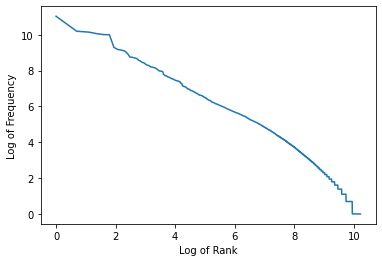

In [21]:
logofrank = np.log(df.index.values + 1)
logoffrequency = np.log(df['count'])
plt.plot(logofrank, logoffrequency)
plt.xlabel('Log of Rank')
plt.ylabel('Log of Frequency')

In [22]:
# TODO: Compute the number of tokens in the corpus.
# Remember to count each occurrence of each word. For instance, the 62,216
# instances of "the" will all count here.

ntokens = 0
ntokens = sum(frequency)
print("The number of tokens in the corpus is", ntokens)

The number of tokens in the corpus is 1000000


In [23]:
# TODO: Compute the proportion of tokens made up by the top 10 most
# frequent words.

freq = frequency[:10]
freq
ntok = sum(freq)
print("The proportion of tokens made up by the top 10 most frequent words is", ntok/ntokens)

The proportion of tokens made up by the top 10 most frequent words is 0.221568


In [214]:
# TODO: Compute the proportion of tokens made up by the words that occur
# exactly once in this collection. 

test4 = df.groupby(["term"]).count()
test4[test4["count"] == 1].shape[0] / ntokens

0.027556

## Acquiring New Documents (for CS6200)

For this assignment so far, you've worked with data that's already been extracted, tokenized, and counted. In this final section, you'll briefly explore acquiring new data.

Find a collection of documents that you're interested in. For the statistics to be meaningful, this collection should have at least 1,000 words.

The format could be anything you can extract text from: HTML, PDF, MS PowerPoint, chat logs, etc.

The collection should be in a natural language, not mostly code or numerical data. It could be in English or in any other language.

The final project for this course will involve designing an information retrieval task on some dataset. You could use this exercise to think about what kind of data you might be interested in, although that is not required.

**TODO**: Write code to download and extract the text from the collection. Describe choices you make about what contents to keep.

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
# TODO: Data acquisition code here.

#importing the file stored in the drive
import pandas as pd
file = '/content/drive/MyDrive/dataset/test2.txt'
f = open(f, 'rt')
text = f.read()

In [38]:
#using regex to split the words based on the white spaces

import re 
word = re.split(r'\W+', text)
print(word[:100])

['Artificial', 'intelligence', 'AI', 'the', 'ability', 'of', 'a', 'digital', 'computer', 'or', 'computer', 'controlled', 'robot', 'to', 'perform', 'tasks', 'commonly', 'associated', 'with', 'intelligent', 'beings', 'The', 'term', 'is', 'frequently', 'applied', 'to', 'the', 'project', 'of', 'developing', 'systems', 'endowed', 'with', 'the', 'intellectual', 'processes', 'characteristic', 'of', 'humans', 'such', 'as', 'the', 'ability', 'to', 'reason', 'discover', 'meaning', 'generalize', 'or', 'learn', 'from', 'past', 'experience', 'Since', 'the', 'development', 'of', 'the', 'digital', 'computer', 'in', 'the', '1940s', 'it', 'has', 'been', 'demonstrated', 'that', 'computers', 'can', 'be', 'programmed', 'to', 'carry', 'out', 'very', 'complex', 'tasks', 'as', 'for', 'example', 'discovering', 'proofs', 'for', 'mathematical', 'theorems', 'or', 'playing', 'chess', 'with', 'great', 'proficiency', 'Still', 'despite', 'continuing', 'advances', 'in', 'computer', 'processing']


Note: The data I have taken is from a text file containing about two to three paragraphs about Artificial Intelligence. I have taken all the paragraphs since they were important. 

**TODO**: Write code to tokenize the text and count the resulting terms in each document. Describe your tokenization approach here.

Each term may also be associated with a field, such as `body` and `title` in the newswire collection above. Describe the different fields in your data.

In [60]:
# TODO: Tokenization code here.

#tokenize the document by words to get a list of individual words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)

#make these tokens lower cased for simplicity
tokens = [w.lower() for w in tokens]

#remove the punctuations from these tokens
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
words = [word for word in stripped if word.isalpha()]

#remove the stopwords from the stripped words 
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

['artificial', 'intelligence', 'ai', 'ability', 'digital', 'computer', 'computercontrolled', 'robot', 'perform', 'tasks', 'commonly', 'associated', 'intelligent', 'beings', 'term', 'frequently', 'applied', 'project', 'developing', 'systems', 'endowed', 'intellectual', 'processes', 'characteristic', 'humans', 'ability', 'reason', 'discover', 'meaning', 'generalize', 'learn', 'past', 'experience', 'since', 'development', 'digital', 'computer', 'demonstrated', 'computers', 'programmed', 'carry', 'complex', 'example', 'discovering', 'proofs', 'mathematical', 'theorems', 'playing', 'great', 'proficiency', 'still', 'despite', 'continuing', 'advances', 'computer', 'processing', 'speed', 'memory', 'capacity', 'yet', 'programs', 'match', 'human', 'flexibility', 'wider', 'domains', 'tasks', 'requiring', 'much', 'everyday', 'knowledge', 'hand', 'programs', 'attained', 'performance', 'levels', 'human', 'experts', 'professionals', 'performing', 'certain', 'specific', 'tasks', 'artificial', 'intelli

In [183]:
#create a dataframe using words and the count 
df111 = pd.DataFrame(words, columns=['words'])
df111['count'] = 1
df111

,words,count
0,artificial,1
1,intelligence,1
2,ai,1
3,ability,1
4,digital,1
...,...,...
407,close,1
408,passing,1
409,undiluted,1
410,turing,1


Ans. For tokenization, we have used the word_tokenize function from the nltk library. We then get each word as a token seperately. The punctuations are removed from this list of tokens. Then we make all the words lower cased for simplicity. The next step is to identify the stopwords and remove them from our corpus. 
This list of words is then converted into a dataframe with columns as words and their respective counts in the count column. 

**TODO**: Plot a graph of the log rank against log frequency for your collection, as you did for the sample collection above. What do you observe about the differences between the distributions in these two collections?

In [194]:
#getting the count - frequency for plotting the graph

a = df111.groupby(["words"]).count()
a = a.sort_values(by = ['count'], ascending=False)
a = a.reset_index()
a

,words,count
0,computer,16
1,intelligence,9
2,human,7
3,turing,6
4,test,6
...,...,...
292,forms,1
293,frequently,1
294,generally,1
295,great,1


Text(0, 0.5, 'Log of Frequency')

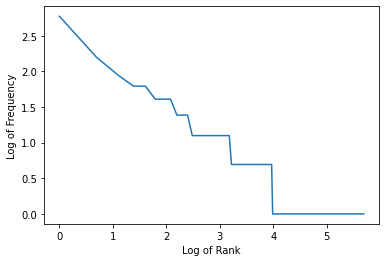

In [195]:
logofrank = np.log(a.index.values + 1)
logoffrequency = np.log(a['count'])
plt.plot(logofrank, logoffrequency)
plt.xlabel('Log of Rank')
plt.ylabel('Log of Frequency')

Ans. The graph obtained from the dataset chosen by me gives a similar kind of curve but has a steep fall at the later part of the ranks. This might be due to the shortage or less data given compared to the first graph where there were plenty of documents in the corpus with a lot of words. 